# COMP5318 - Machine Learning and Data Mining 

## Tutorial 10 - KNN and Decision Trees

**Semester 2, 2019**

**Objectives:**

* To learn about k-NN
* To learn about Decision Trees

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab10.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab10.ipynb" file
* Complete exercises in "lab10.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran

Tutors: Fengxiang He, Shaojun Zhang, Fangzhou Shi, Yang Lin, Iwan Budiman, Zhiyi Wang, Canh Dinh, Yixuan Zhang, Rui Dong, Haoyu He, Dai Hoang Tran, Peibo Duan

## 1. k-nearest neighbors (k-NN) classification algorithm

In [2]:
import numpy as np
import matplotlib.pylab as pl
%matplotlib inline

*Step 1:* **Loading data**

In [14]:
X = np.asarray(([2,1,3,5,3,6.5,6,10,9,5,8,11,15,13,16],[1,0,3,5,2,5.5,6,12,11,10,7,9,11,15,16])).T
y = np.asarray([0,0,0,0,0,1,1,1,1,1,1,2,2,2,2])[:,np.newaxis]

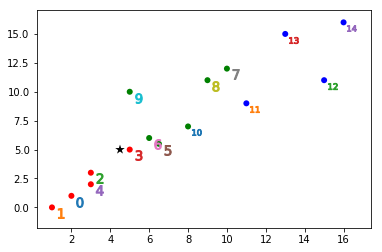

In [15]:
N = len(y)

X_q = np.asarray(([4.5],[5])).T #query point

pos_of_class0 = np.where(y==0)[0] #class 0 points
pos_of_class1 = np.where(y==1)[0] #class 1 points
pos_of_class2 = np.where(y==2)[0] #class 2 points

pl.scatter(X[pos_of_class0,0], X[pos_of_class0,1], c='r', edgecolor='') #class = 0
pl.scatter(X[pos_of_class1,0], X[pos_of_class1,1], c='g', edgecolor='') #class = 1
pl.scatter(X[pos_of_class2,0], X[pos_of_class2,1], c='b', edgecolor='') #class = 2
pl.scatter(X_q[:,0], X_q[:,1], marker='*', s=100, c='k', edgecolor='') #class to be determined
for i in range(N): 
    pl.scatter(X[i,0]+0.4, X[i,1]-0.5, s=100, marker="$ {} $".format(i)) #positions 

This data set has 3 classes in total. We will decide what is the class for the new training data **"the star point"** using KNN algorithm.

*Step 2:* **Determining the nearest neighbors**

Calculate all distances between "star point" and training points and sort the distances

In [16]:
dis =  #TODO: calculate distances between X_q and each training point and store in dis (list)
arg_ascending =  #TODO: arrange distances in the ascending order from low to high

np.set_printoptions(precision=3)
print('Distance between X_q and each training point= \n', dis)
print('Index of nearest neighbors in training data=\n', arg_ascending) #Check the plot in Step 1

Distance between X_q and each training point= 
 [2.225e+01 3.725e+01 6.250e+00 2.500e-01 1.125e+01 4.250e+00 3.250e+00
 7.925e+01 5.625e+01 2.525e+01 1.625e+01 5.825e+01 1.462e+02 1.722e+02
 2.532e+02]
Index of nearest neighbors in training data=
 [ 3  6  5  2  4 10  0  9  1  8 11  7 12 13 14]


*Step 3:* **Determining the classes of k-nearest neighbors**

Considering 5 nearest neighbors

In [18]:
K = 5 #Let us consider 5-nearest neighbors 

classes = np.zeros(3)
for i in range(K):
    if y[arg_ascending[i]]==0: #class = 0
        print(i, 'th nearest neighbor belongs to class 0.')
        classes[0] += 1
    elif y[arg_ascending[i]]==1: #class = 1
        print(i, 'th nearest neighbor belongs to class 1.')
        classes[1] += 1
    elif y[arg_ascending[i]]==2: #class = 2
        print(i, 'th nearest neighbor belongs to class 2.')
        classes[2] += 1
    else:
        print('Error - Invalid class')

0 th nearest neighbor belongs to class 0.
1 th nearest neighbor belongs to class 1.
2 th nearest neighbor belongs to class 1.
3 th nearest neighbor belongs to class 0.
4 th nearest neighbor belongs to class 0.


*Step 4:* **Determining the class of X_q**

In [19]:
prob = #TODO: Calculate the probability P(y_q = c|X_q)
print('classes', classes)
print('probabilities=', prob)

#TODO: Decide the class of X_q
print('ANSWER: X_q belongs to', TODO, 'th class!')

classes [3. 2. 0.]
probabilities= [0.6 0.4 0. ]
ANSWER: X_q belongs to 0 th class!


*Additional Step:* **Create decision surface**

In [10]:
def calc_knn(X, y, K, X_q):
    dis = ((X - X_q)**2).sum(axis=1) #calculate distance between X_q and each training point
    arg_ascending = np.argsort(dis)
    
    classes = np.zeros(3)
    for i in range(K):
        if y[arg_ascending[i]]==0: #class = 0
            classes[0] += 1
        elif y[arg_ascending[i]]==1: #class = 1
            classes[1] += 1
        elif y[arg_ascending[i]]==2: #class = 2
            classes[2] += 1
        else:
            print('Error - Invalid class')
            
    return np.argmax(classes)

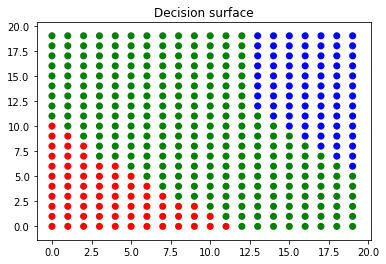

In [11]:
for i in range(20):
    for j in range(20):
        X_q = np.asarray(([i],[j])).T #query point
        class_out = calc_knn(X, y, 4, X_q)
        
        if class_out ==0:
            pl.scatter(X_q[:,0], X_q[:,1], s=50, c='r', edgecolor='')
        elif class_out ==1:
            pl.scatter(X_q[:,0], X_q[:,1], s=50, c='g', edgecolor='')
        else:
            pl.scatter(X_q[:,0], X_q[:,1], s=50, c='b', edgecolor='')
            
pl.title('Decision surface')
pl.show()

**Exercise** 1.1: Change the value of K to 3 and Discuss the impact of K on the 'Decision surface'

**Exercise** 1.2: Discuss about Pros and Cons of KNN Algorithm.

## 2. Decision Trees

This section will use the decision tree classifier for the diabetes dataset. Using some information related to "Glucose", "Skin Thickness", "Age", "Bmi", "insulin", ... to decide patients with diabetes or not.

In [9]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [10]:
col_names = ['pregnant', 'glucose', 'bp', 'skthinkness', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = #TODO: Read the diabetes dataset in data folder with the given col_names

In [11]:
data.head()

,pregnant,glucose,bp,skthinkness,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [12]:
feature_cols = ['bmi','insulin','glucose', 'skthinkness','age','bp','pedigree','pregnant']

data = #TODO: Remove the first row
X = data[feature_cols]
y = data.label 

In [13]:
# Split data into training set and test set
#TODO: split dataset into 70% training and 30% test

### 2.1 Create Decision Trees model using sk-learn

In [14]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()
# Train Decision Tree classifier
clf = clf.fit(X_train,y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [15]:
#TODO: Compute and print accuracy


Accuracy: 0.696969696969697


### 2.2 Visualize the created decision trees 

We can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. 
For plotting tree, you also need to install graphviz and pydotplus.

Install graphviz software: https://graphviz.gitlab.io/download/

*Linux: sudo apt-get install graphviz

*Mac:  brew install graphviz

*Windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html and then Add C:\Program Files (x86)\Graphviz2.38\bin to User path

and then install graphviz and pydotplus libraries for Python using **pip** or **anaconda**

For example with pip:

    pip install graphviz
    pip install pydotplus

or if you are using Anaconda, you can use 'Anaconda Prompt'

    conda install -c anaconda graphviz
    conda install -c anaconda pydotplus
    
If you get an error "make sure the Graphviz executables are on your systems' path", please refer this link to fix it:
https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

If you are on Windows and get an error "InvocationException: GraphViz's executables not found", please refer this link to fix it: 
https://stackoverflow.com/questions/18438997/why-is-pydot-unable-to-find-graphvizs-executables-in-windows-8


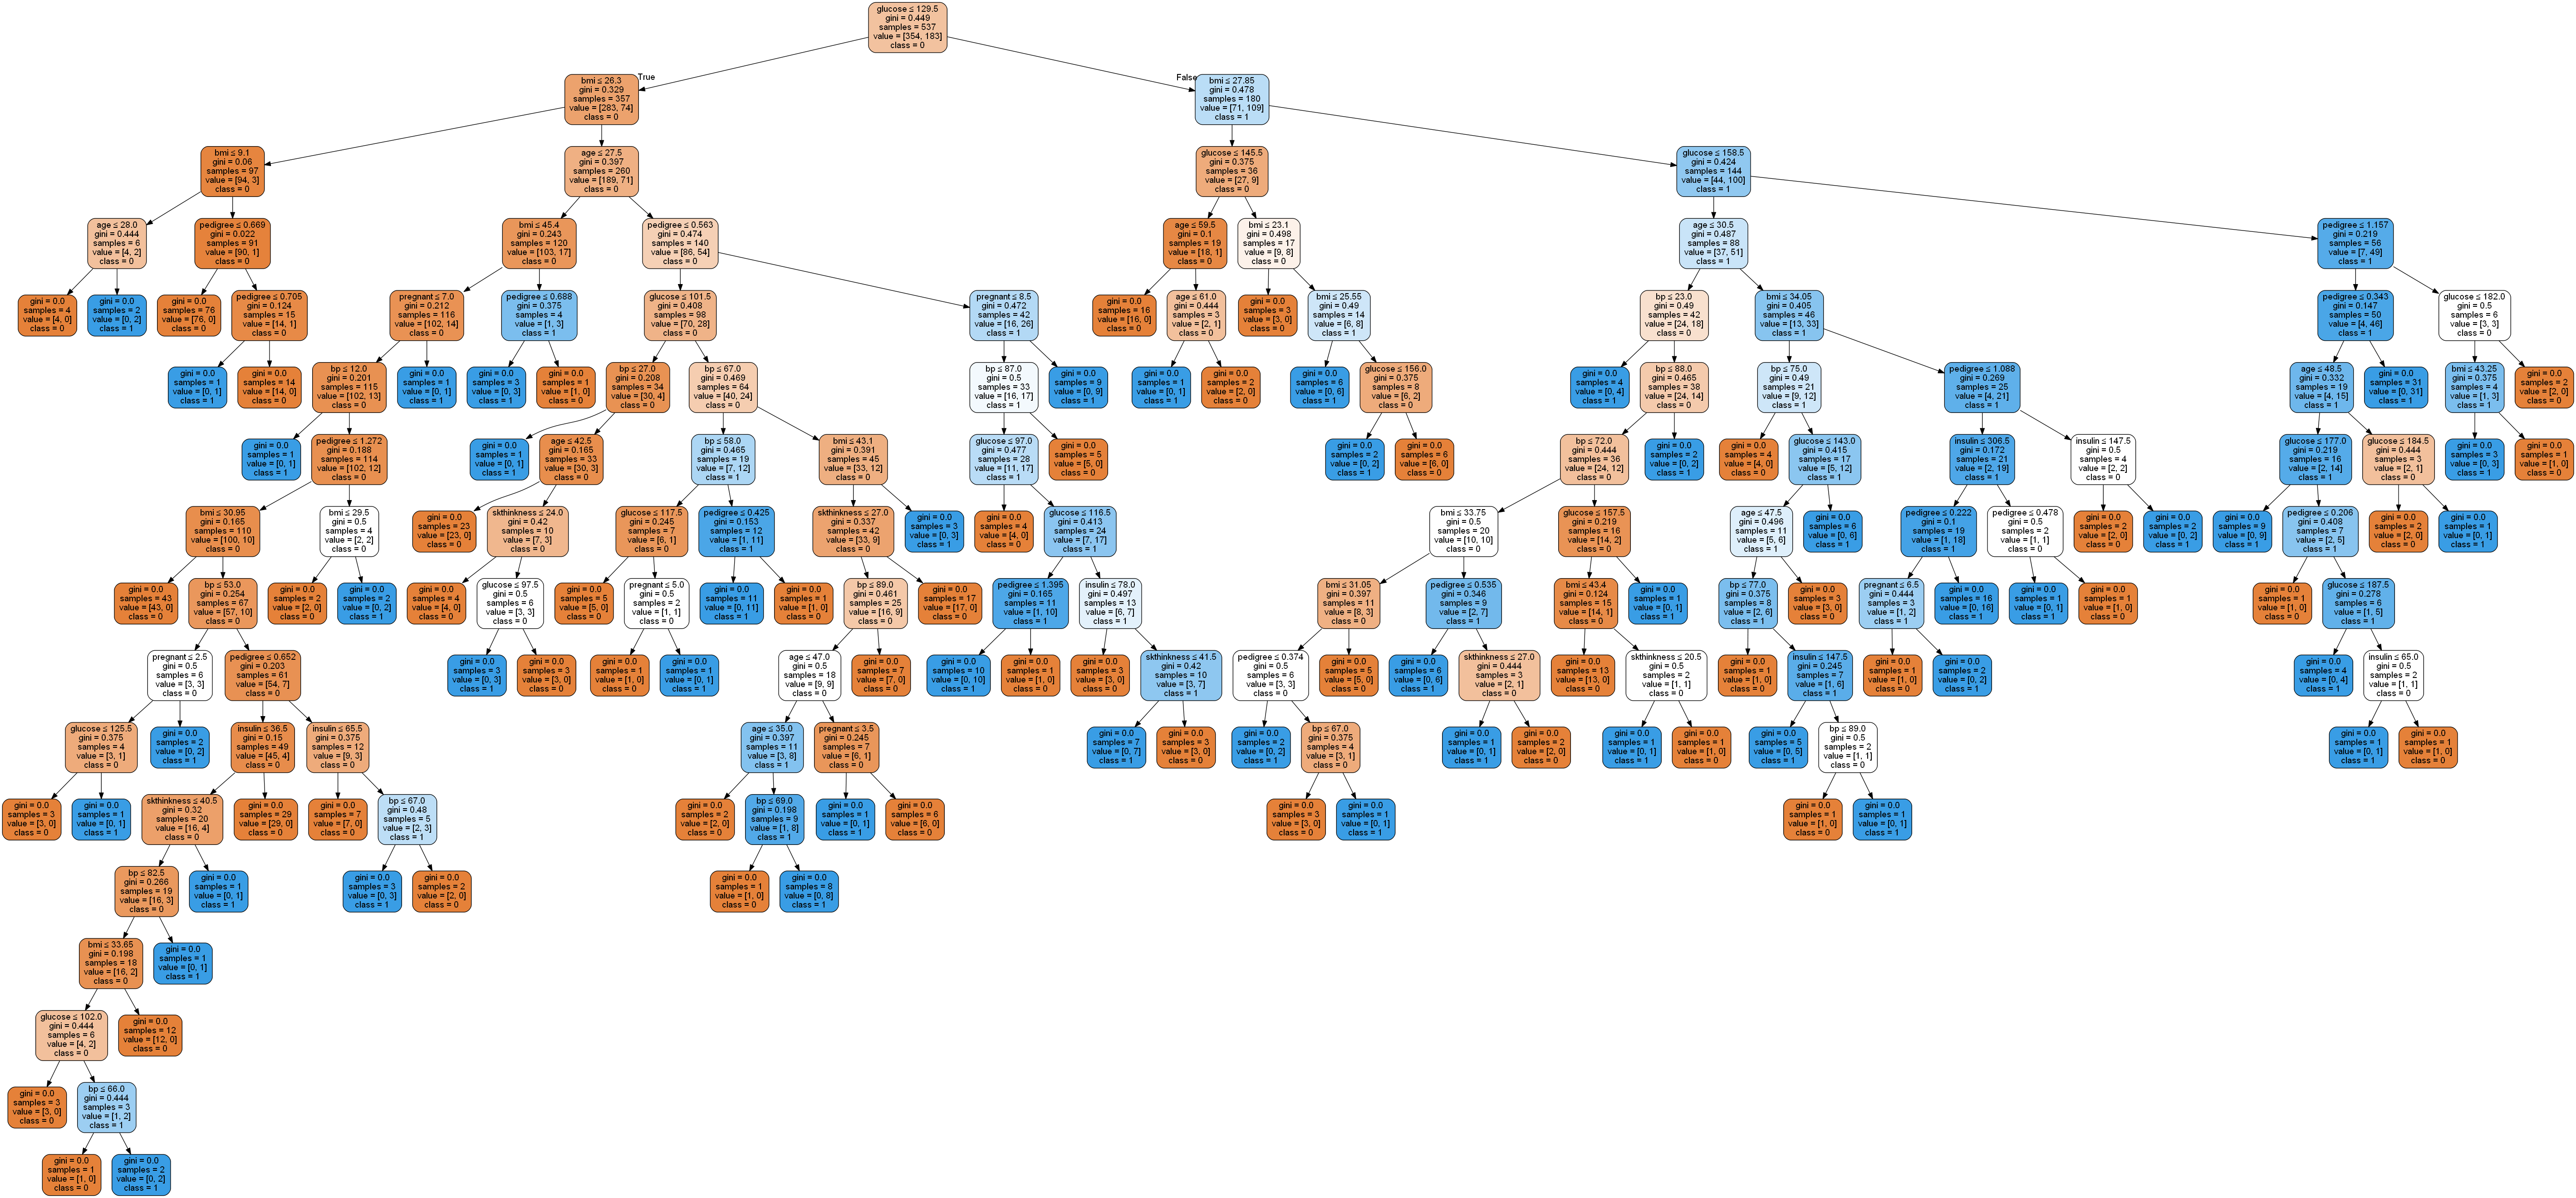

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

The decision tree obtained is extremely complex so it is considered as an unpruned tree (unexplainable and not easy to understand). In the next section, We will optimize and reduce the complexity of the tree.

### 2.3 Optimizing Decision Tree Performance

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning.

The maximum depth of the tree can be used as a control variable for pre-pruning.

In part, we will change the max_depth variable of Decision Tree Algothim to see the changing of Decision Tree. 

(Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.)

In [17]:
# Create Decision Tree classifier object
clf = #TODO Create Decision Tree classifier with small max_depth = 3 and using criterion = "entropy"

# Train Decision Tree classifier
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# TODO: Compute and print accuracy


Accuracy: 0.7705627705627706


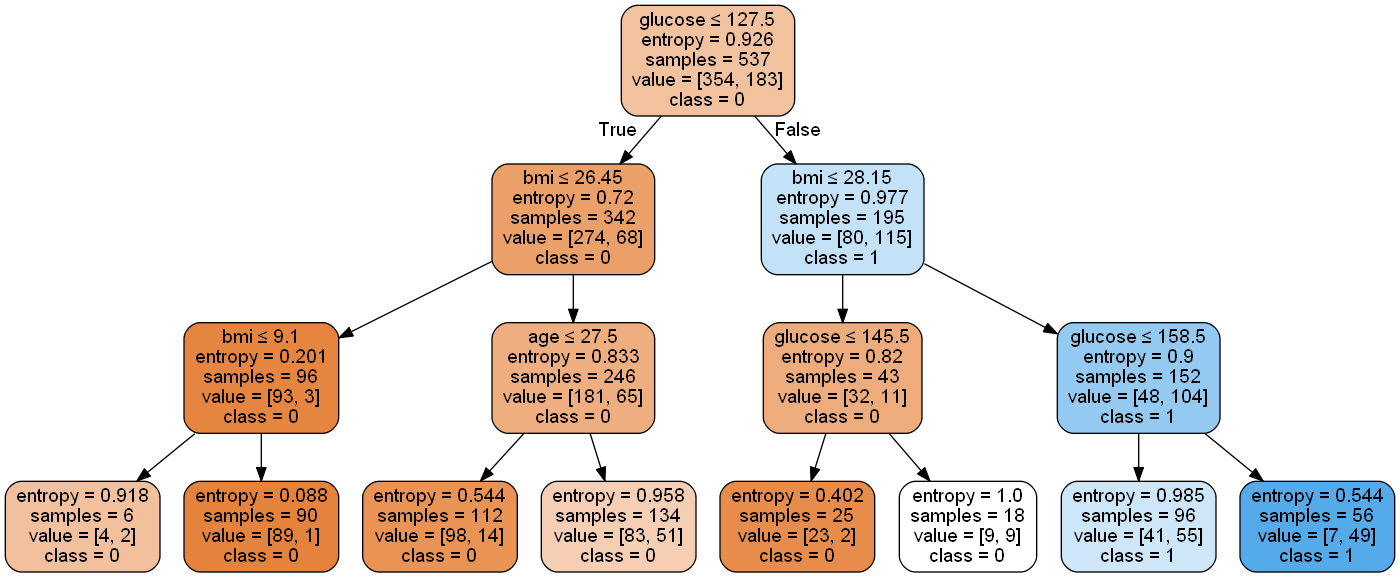

In [18]:
#TODO: Visualize the new tree


When we using smaller "max_depth", the pruned model is less complex, explainable, and easy to understand than the previous decision tree model plot. This model also obtains higher accuracy.

**Exercise** 2.1: Discuss about the Pros and Cons of Decision Tree Algorithm.

In [ ]:
#TODO: List the pros and cons
